In [1]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'e'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1500])

In [3]:
time_window = 50
time_step = 25
trial_bin_size = 20
n_splits = 30
group_dict = OrderedDict([('1 Color',[11]),('2 Color',[12]),('1 Motion',[21]),('2 Motion',[22])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [4]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)

    xdata_color, ydata_color = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Color'],group_dict['2 Color']])
    xdata_motion, ydata_motion = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Motion'],group_dict['2 Motion']])
    xdata_color, ydata_color = wrangl.group_labels(xdata_color, ydata_color)
    xdata_motion, ydata_motion = wrangl.group_labels(xdata_motion, ydata_motion)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_color,xdata_motion,ydata_color,ydata_motion):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6


In [5]:
interp = eeg_decoder.Interpreter(clfr, subtitle='1v2') 
# interp.save_results()

No handles with labels found to put in legend.


Mean delay accuracy: 0.6691697191697192
Mean delay S.D.: 0.046802985214104226


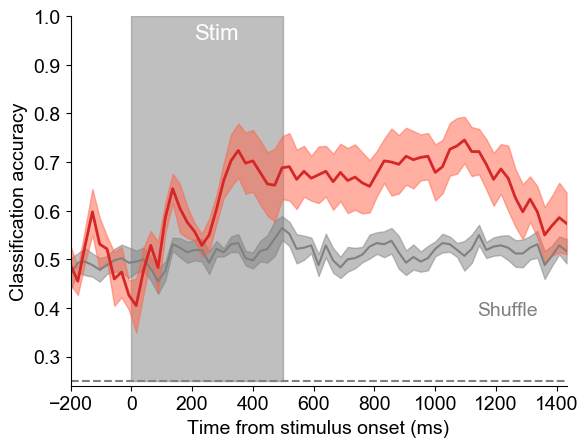

In [6]:
import matplotlib.pyplot as plt
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.24,1],chance_text_y=.23,title='',stim_time=[0,500],)
plt.show()

In [7]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)

    xdata_color, ydata_color = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Color'],group_dict['2 Color']])
    xdata_motion, ydata_motion = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Motion'],group_dict['2 Motion']])
    xdata_color, ydata_color = wrangl.group_labels(xdata_color, ydata_color)
    xdata_motion, ydata_motion = wrangl.group_labels(xdata_motion, ydata_motion)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_motion,xdata_color,ydata_motion,ydata_color):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1


In [ ]:
interp = eeg_decoder.Interpreter(clfr, subtitle='1v2') 
# interp.save_results()

No handles with labels found to put in legend.


Mean delay accuracy: 0.6094551282051281
Mean delay S.D.: 0.07672985213555575


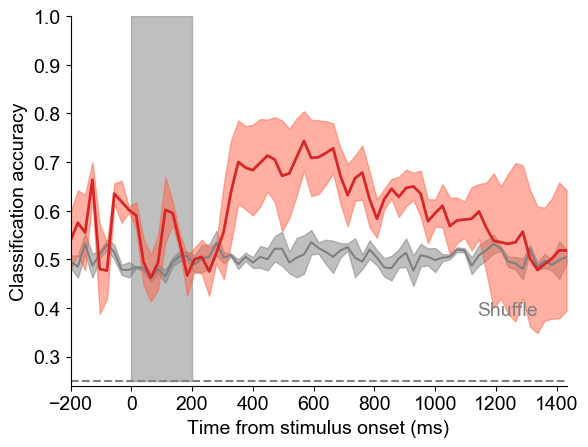

In [ ]:
import matplotlib.pyplot as plt
interp.chance = .5
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.24,1],chance_text_y=.23, title='',stim_time=[0,200])
plt.show()